In [1]:
import numpy  as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import load_iris

In [2]:
data = load_iris()
dir(data)

['DESCR', 'data', 'feature_names', 'filename', 'target', 'target_names']

In [3]:
df = pd.DataFrame(data.data,columns=data.feature_names)

In [4]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


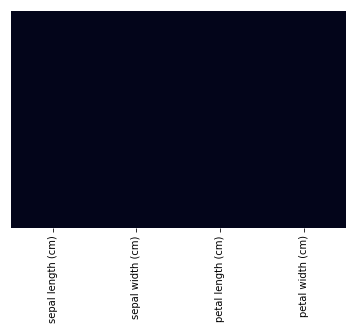

In [8]:
sns.heatmap(df.isnull(),yticklabels=False,cbar= False)  # here no null values

In [9]:
df["target"] = data.target

In [12]:
data.target_names

array(['setosa', 'versicolor', 'virginica'], dtype='<U10')

In [13]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [19]:
df["flower"] = df["target"].apply(lambda x : data.target_names[x])

In [20]:
df

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),target,flower
0,5.1,3.5,1.4,0.2,0,setosa
1,4.9,3.0,1.4,0.2,0,setosa
2,4.7,3.2,1.3,0.2,0,setosa
3,4.6,3.1,1.5,0.2,0,setosa
4,5.0,3.6,1.4,0.2,0,setosa
5,5.4,3.9,1.7,0.4,0,setosa
6,4.6,3.4,1.4,0.3,0,setosa
7,5.0,3.4,1.5,0.2,0,setosa
8,4.4,2.9,1.4,0.2,0,setosa
9,4.9,3.1,1.5,0.1,0,setosa


In [32]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(df.drop(["target","flower"],axis = 1), df["target"], test_size=0.33, random_state=42)

In [33]:
len(X_train)

100

In [34]:
len(y_test)

50

In [35]:
def get_score(model,X_train,X_test,y_train,y_test):
    model.fit(X_train,y_train)
    return model.score(X_test,y_test)

In [36]:
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

# Decision tree

In [37]:
get_score(DecisionTreeClassifier(),X_train,X_test,y_train,y_test)

1.0

# Logistic regression

In [38]:
get_score(LogisticRegression(),X_train,X_test,y_train,y_test)

C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)


1.0

# Random forest

In [43]:
get_score(RandomForestClassifier(n_estimators=100),X_train,X_test,y_train,y_test)

0.98

# SVM

In [44]:
get_score(SVC(),X_train,X_test,y_train,y_test)

C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


1.0

In [48]:
from sklearn.model_selection import cross_val_score
score =cross_val_score(SVC(),X_test,y_test,cv=5)
print(score)
np.average(score)

[1.         0.9        1.         1.         0.88888889]


C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\svm\base.py:196: Fut

0.9577777777777777

In [50]:
score =cross_val_score(RandomForestClassifier(n_estimators=50),X_test,y_test,cv=5)
print(score)
np.average(score)

[1. 1. 1. 1. 1.]


1.0

In [56]:
score =cross_val_score(LogisticRegression(C=100),X_test,y_test,cv=5)
print(score)
np.average(score)

[1.         0.9        1.         0.9        0.88888889]


C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:460: FutureWarning: Default multi_class will be changed to 'auto' in 0.22. Specify the multi_class option to silence this warning.
  "this warning.", FutureWarning)
C:\Users\Saurabh\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:433: FutureWarning: 

0.9377777777777776

In [62]:
score =cross_val_score(DecisionTreeClassifier(max_depth=15),X_test,y_test,cv=5)
print(score)
np.average(score)

[0.90909091 0.9        1.         1.         1.        ]


0.9618181818181817